In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [3]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [4]:
os.chdir("/mnt/lanlep2019/")

In [5]:
!pwd

/mnt/lanlep2019


# data

In [6]:
import data
import config

In [7]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [8]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types= ['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [9]:
traintest.num_dataset()

5

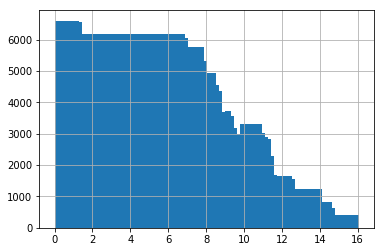

In [10]:
traintest.ydf.hist(bins=100);

In [11]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [12]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 282)

In [13]:
datadf=traintest.traindf
datadf.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                    
quake_03_0200_105000  0.146316  0.267394  0.117802 -0.157496  0.061104   
quake_06_0120_099000  0.148596  0.267133  0.130696 -0.214939  0.099131   
quake_07_0296_013500  0.177460  0.230688  0.130831 -0.158412  0.087166   
quake_03_0090_034500  0.204399  0.217211  0.080866 -0.092751  0.087826   
quake_08_0137_055500  0.192906  0.242893  0.097641 -0.097974  0.083360   

                         fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  \
index                                                                    
quake_03_0200_105000 -0.047981  0.023396  0.213477  0.177386 -0.101902   
quake_06_0120_099000 -0.010598  0.015269  0.249279  0.170874 -0.169247   
quake_07_0296_013500 -0.039375 -0.019466  0.233472  0.170282 -0.139383   
quake_03_0090_034500 -0.115556 -0.022419  0.137570  0.176601 -0.000350   
quake_08_0137_055500 -0.108193 -0.032382  0.158772  0.151101  0.020051   

                           ...         fwvextdis_pca10_2  fwvextdis_pca10_3  \
index                      ...                                                
quake_03_0200_105000       ...                 -0.867152           0.251729   
quake_06_0120_099000       ...                  0.599042          -0.058171   
quake_07_0296_013500       ...                  0.276776          -0.041059   
quake_03_0090_034500       ...                 -1.211162           0.021516   
quake_08_0137_055500       ...                 -1.418130          -0.099060   

                      fwvextdis_pca10_4  fwvextdis_pca10_5  fwvextdis_pca10_6  \
index                                                                           
quake_03_0200_105000           0.083587           0.029462          -0.022975   
quake_06_0120_099000          -0.059255           0.019930           0.002073   
quake_07_0296_013500           0.105883           0.042710          -0.009792   
quake_03_0090_034500          -0.055162           0.053457          -0.030760   
quake_08_0137_055500          -0.037935          -0.052247           0.054380   

                      fwvextdis_pca10_7  fwvextdis_pca10_8  fwvextdis_pca10_9  \
index                                                                           
quake_03_0200_105000          -0.039655           0.000274           0.028007   
quake_06_0120_099000           0.007824          -0.008991           0.020008   
quake_07_0296_013500          -0.018473           0.035101          -0.005669   
quake_03_0090_034500          -0.066036           0.022193           0.016614   
quake_08_0137_055500          -0.019536           0.042780           0.010705   

                      fwv_wholereg  fwvext_wholereg  
index                                                
quake_03_0200_105000     93.940635        -6.822180  
quake_06_0120_099000     20.000997       -12.672698  
quake_07_0296_013500     37.947210       -38.633617  
quake_03_0090_034500     80.679887        11.746026  
quake_08_0137_055500     53.077711         4.727631  

[5 rows x 282 columns]

In [14]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [15]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [16]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [17]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 282))

In [18]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [19]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [20]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 282))

In [21]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [22]:
if 0:
    for qno in quakes:
        r=11/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r

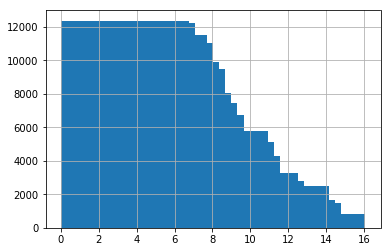

In [23]:
ydf.hist(bins=50);

In [24]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [25]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [26]:
GNO=111
!mkdir -p input/sub/{GNO}

In [27]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/111'

In [28]:
from sklearn.linear_model import LinearRegression, Ridge

In [29]:
X=datadf.values
Y=ydf.values

# weighted lr

In [30]:
reg = LinearRegression().fit(X,Y,sample_weight=wdf.values)

In [31]:
ypred=reg.predict(X)
np.mean(np.abs(Y-ypred))

2.071765700202237

In [32]:
np.sqrt(reg.score(X,Y))

0.7003722451543147

In [33]:
config.quake_length

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [34]:
tmpdict = {}
a=0
for i in range(1,16):
    tmpdict[i]=a+config.quake_length[i]
    a=tmpdict[i]
tmpdict

{1: 11.540566395569977,
 2: 25.72076999478228,
 3: 34.57701340322952,
 4: 47.27089162767743,
 5: 55.325987691874275,
 6: 62.38523520128648,
 7: 78.49223550655667,
 8: 86.3983798249896,
 9: 96.03555595765623,
 10: 107.46228066182093,
 11: 118.48683539267182,
 12: 127.31541659379985,
 13: 135.8812043577587,
 14: 150.6327440363285,
 15: 160.09224201511958}

In [35]:
tmpdf=qdf.copy()

In [36]:
tmpdf['y']=ydf

In [37]:
tmpdf['qlen']=tmpdf['index'].map(lambda u: tmpdict[u])
tmpdf['time_to_begin'] =tmpdf['qlen']-tmpdf["y"]

In [38]:
plt.rcParams['figure.figsize'] = (12, 8)


In [39]:
def ff(x,y):
    idx=np.argsort(x)
    return x[idx],y[idx]

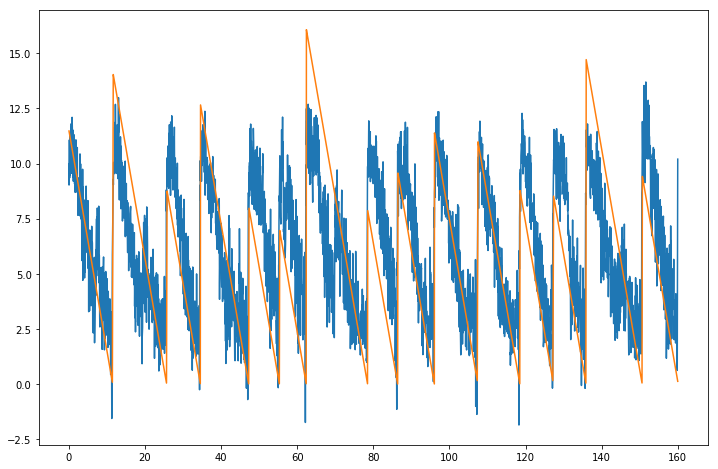

In [40]:
N=5000
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,ypred[:N]) )
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,Y[:N]) )


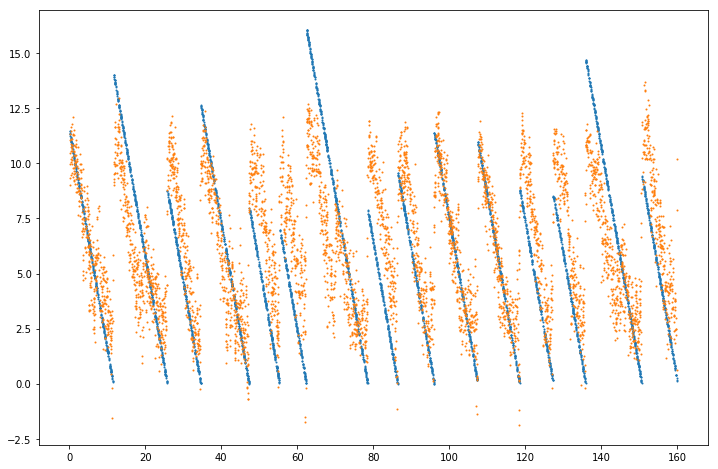

In [41]:
N=5000
plt.scatter(tmpdf['time_to_begin'][:N].values,Y[:N],s=1)
plt.scatter(tmpdf['time_to_begin'][:N].values,ypred[:N],s=1)

In [54]:
def make_sub(key):
    fname =os.path.join(sub_path, "sub{}_k{}.csv".format(GNO, key))
    print "write to " + fname    
    pred=reg.predict(testdf.values)
    pred[pred<0]=0
    pred=pd.DataFrame(pred, index=testdf.index).reset_index()
    pred.columns=["seg_id","time_to_failure"]
    pred.to_csv(fname,index=None)


In [56]:
make_sub("rmse_weighted")

write to /home/hadoop/lanlep2019/input/sub/111/sub111_krmse_weighted.csv


# weighted lr

In [57]:
reg = LinearRegression().fit(X,Y,sample_weight=None)

In [58]:
ypred=reg.predict(X)
np.mean(np.abs(Y-ypred))

1.950198093314054

In [59]:
np.sqrt(reg.score(X,Y))

0.7311975718744703

In [60]:
config.quake_length

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [61]:
tmpdict = {}
a=0
for i in range(1,16):
    tmpdict[i]=a+config.quake_length[i]
    a=tmpdict[i]
tmpdict

{1: 11.540566395569977,
 2: 25.72076999478228,
 3: 34.57701340322952,
 4: 47.27089162767743,
 5: 55.325987691874275,
 6: 62.38523520128648,
 7: 78.49223550655667,
 8: 86.3983798249896,
 9: 96.03555595765623,
 10: 107.46228066182093,
 11: 118.48683539267182,
 12: 127.31541659379985,
 13: 135.8812043577587,
 14: 150.6327440363285,
 15: 160.09224201511958}

In [62]:
tmpdf=qdf.copy()

In [63]:
tmpdf['y']=ydf

In [64]:
tmpdf['qlen']=tmpdf['index'].map(lambda u: tmpdict[u])
tmpdf['time_to_begin'] =tmpdf['qlen']-tmpdf["y"]

In [65]:
plt.rcParams['figure.figsize'] = (12, 8)


In [66]:
def ff(x,y):
    idx=np.argsort(x)
    return x[idx],y[idx]

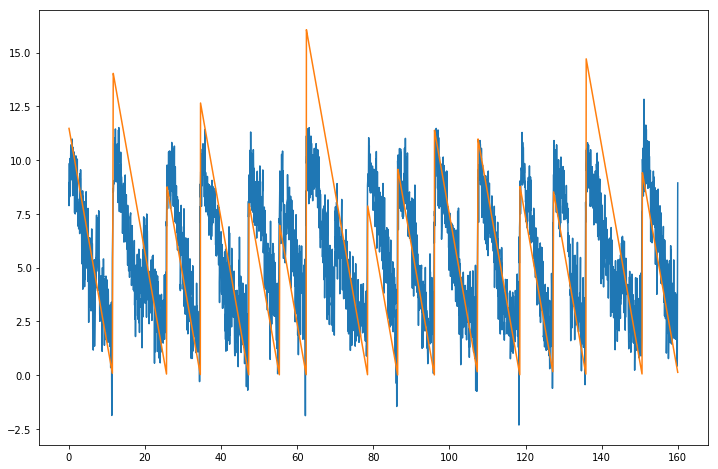

In [67]:
N=5000
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,ypred[:N]) )
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,Y[:N]) )


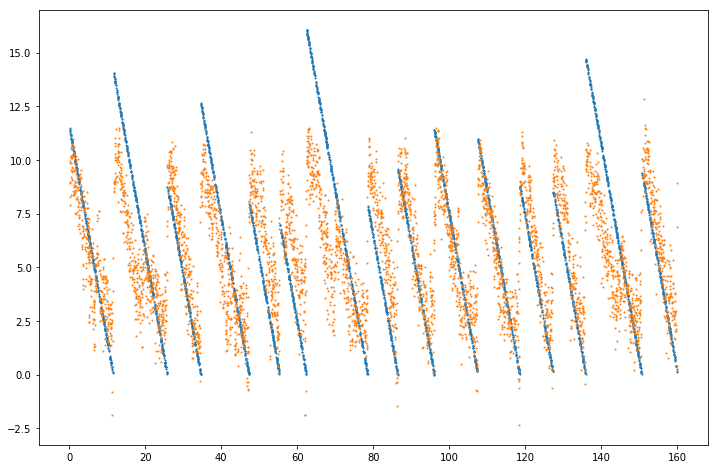

In [68]:
N=5000
plt.scatter(tmpdf['time_to_begin'][:N].values,Y[:N],s=1)
plt.scatter(tmpdf['time_to_begin'][:N].values,ypred[:N],s=1)

In [70]:
def make_sub(key):
    fname =os.path.join(sub_path, "sub{}_k{}.csv".format(GNO, key))
    print "write to " + fname    
    pred=reg.predict(testdf.values)
    pred[pred<0]=0
    pred=pd.DataFrame(pred, index=testdf.index).reset_index()
    pred.columns=["seg_id","time_to_failure"]
    pred.to_csv(fname,index=None)
    return pred


In [71]:
pred=make_sub("rmse")

write to /home/hadoop/lanlep2019/input/sub/111/sub111_krmse.csv


In [73]:
pred.hist(bins=50);
